Blank


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Recall
from tensorflow.keras.utils import plot_model
import pickle


In [2]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('../../Data/complete_fire.csv')

In [4]:
df.dropna(inplace = True)

In [5]:
df.shape

(167273, 23)

In [6]:
df.dtypes

unique_fire_identifier     object
lattitude                 float64
longitude                 float64
acres_burned              float64
fire_cause                 object
incident_name              object
IsFSAssisted              float64
origin_county              object
state                      object
year                        int64
month                       int64
value                     float64
anomaly                   float64
area (acres)              float64
population                float64
d0                        float64
d1                        float64
d2                        float64
d3                        float64
d4                        float64
DSCI_avg                  float64
DSCI_summed               float64
precipitation(in)         float64
dtype: object

In [7]:
conditions = [df['acres_burned'] <= .25,
             (df['acres_burned'] > .25) & (df['acres_burned'] <= 9.9),
             (df['acres_burned'] > 9.9) & (df['acres_burned'] <= 99.99),
             (df['acres_burned'] > 99.99) & (df['acres_burned'] <= 299),
             (df['acres_burned'] > 299) & (df['acres_burned'] <= 999),
             (df['acres_burned'] > 999) & (df['acres_burned'] <= 5000),
             (df['acres_burned'] > 5000) & (df['acres_burned'] <= 9999),
             (df['acres_burned'] > 9999) & (df['acres_burned'] <= 49_999),
             (df['acres_burned'] > 49_999) & (df['acres_burned'] <= 100_000),
              (df['acres_burned'] > 100_000)
                
             ]
# choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
choices = [0,1,2,3,4,5,6,7,8,9]

df['class'] = np.select(conditions, choices, default = 'A')

In [8]:
df.dtypes

unique_fire_identifier     object
lattitude                 float64
longitude                 float64
acres_burned              float64
fire_cause                 object
incident_name              object
IsFSAssisted              float64
origin_county              object
state                      object
year                        int64
month                       int64
value                     float64
anomaly                   float64
area (acres)              float64
population                float64
d0                        float64
d1                        float64
d2                        float64
d3                        float64
d4                        float64
DSCI_avg                  float64
DSCI_summed               float64
precipitation(in)         float64
class                      object
dtype: object

In [9]:
df['class'].value_counts(normalize = True)

0    0.330621
1    0.230288
2    0.137398
5    0.112289
4    0.102718
3    0.080085
7    0.002983
6    0.002577
8    0.000544
9    0.000496
Name: class, dtype: float64

In [10]:

df = pd.get_dummies(df, columns = ['state', 'origin_county', 'fire_cause'], drop_first = True)

In [11]:
X = df.drop(columns = ['incident_name', 'unique_fire_identifier', 'class', 'acres_burned'])
y = df['class']

In [12]:
y = to_categorical(y)
# y = pd.get_dummies(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, stratify = y)

In [14]:
sc = StandardScaler()

In [15]:
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [16]:
X_train.shape

(125454, 1399)

In [20]:

model = Sequential()
model.add(Dense(32,
                input_shape = (1399,),
                activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [21]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

In [22]:

history = model.fit(Z_train, y_train,
                    validation_data = (Z_test, y_test),
                    epochs = 10,
                    batch_size = 32,
                    verbose = 1)

Epoch 1/10
3921/3921 [==============================] - 22s 5ms/step - loss: 1.3097 - acc: 0.5237 - val_loss: 1.1938 - val_acc: 0.5596
Epoch 2/10
3921/3921 [==============================] - 24s 6ms/step - loss: 1.1393 - acc: 0.5875 - val_loss: 1.1587 - val_acc: 0.5927
Epoch 3/10
3921/3921 [==============================] - 16s 4ms/step - loss: 1.0857 - acc: 0.6104 - val_loss: 1.1459 - val_acc: 0.6083
Epoch 4/10
3921/3921 [==============================] - 16s 4ms/step - loss: 1.0455 - acc: 0.6220 - val_loss: 1.1433 - val_acc: 0.6213
Epoch 5/10
3921/3921 [==============================] - 16s 4ms/step - loss: 1.0191 - acc: 0.6309 - val_loss: 1.1521 - val_acc: 0.6237
Epoch 6/10
3921/3921 [==============================] - 16s 4ms/step - loss: 1.0018 - acc: 0.6383 - val_loss: 1.1669 - val_acc: 0.6285
Epoch 7/10
3921/3921 [==============================] - 16s 4ms/step - loss: 0.9848 - acc: 0.6429 - val_loss: 1.1937 - val_acc: 0.6295
Epoch 8/10
3921/3921 [==============================] -

In [23]:
preds = model.predict(Z_test)

In [24]:
rounded_preds = np.argmax(preds, axis = -1)
rounded_preds[101]

2

In [25]:
y_test2 = np.argmax(y_test, axis = -1)

In [26]:
y_test2[101]

2

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, rounded_preds))

              precision    recall  f1-score   support

           0       0.61      0.83      0.70     13826
           1       0.47      0.35      0.40      9630
           2       0.63      0.49      0.55      5746
           3       0.70      0.58      0.63      3349
           4       0.80      0.73      0.76      4295
           5       0.88      0.86      0.87      4696
           6       0.50      0.01      0.02       108
           7       0.25      0.02      0.04       125
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        21

    accuracy                           0.64     41819
   macro avg       0.48      0.39      0.40     41819
weighted avg       0.63      0.64      0.63     41819



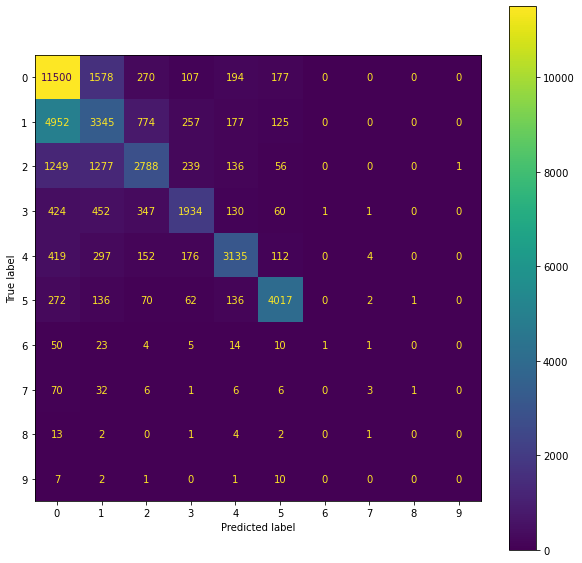

In [27]:

cm = confusion_matrix(y_test2, rounded_preds)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);


In [25]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
model2 = Sequential()
model2.add(Dense(64,
                input_shape = (1400,),
                activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))

model2.add(Dense(10, activation = 'softmax'))

In [26]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

In [27]:
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

history = model2.fit(Z_train, y_train,
                    validation_data = (Z_test, y_test),
                    epochs = 10,
                    batch_size = 32,
                    verbose = 1)

Epoch 1/10
3921/3921 [==============================] - 12s 3ms/step - loss: 1.1614 - acc: 0.5463 - val_loss: 0.9700 - val_acc: 0.6126
Epoch 2/10
3921/3921 [==============================] - 11s 3ms/step - loss: 0.9480 - acc: 0.6210 - val_loss: 0.8838 - val_acc: 0.6426
Epoch 3/10
3921/3921 [==============================] - 12s 3ms/step - loss: 0.8770 - acc: 0.6439 - val_loss: 0.8420 - val_acc: 0.6536
Epoch 4/10
3921/3921 [==============================] - 13s 3ms/step - loss: 0.8372 - acc: 0.6560 - val_loss: 0.7999 - val_acc: 0.6690
Epoch 5/10
3921/3921 [==============================] - 12s 3ms/step - loss: 0.8071 - acc: 0.6671 - val_loss: 0.7778 - val_acc: 0.6774
Epoch 6/10
 747/3921 [====>.........................] - ETA: 8s - loss: 0.7855 - acc: 0.6713

KeyboardInterrupt: 

In [ ]:
model3 = Sequential()
model3.add(Dense(128,
                input_shape = (1400,),
                activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dense(16, activation = 'relu'))

model3.add(Dense(10, activation = 'softmax'))

model3.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

In [ ]:
history = model3.fit(Z_train, y_train,
                    validation_data = (Z_test, y_test),
                    epochs = 30,
                    batch_size = 64,
                    verbose = 1)

Epoch 1/30
1961/1961 [==============================] - 6s 3ms/step - loss: 1.2344 - acc: 0.5182 - val_loss: 1.0203 - val_acc: 0.6002
Epoch 2/30
1961/1961 [==============================] - 6s 3ms/step - loss: 1.0075 - acc: 0.6015 - val_loss: 0.9258 - val_acc: 0.6306
Epoch 3/30
1961/1961 [==============================] - 6s 3ms/step - loss: 0.9295 - acc: 0.6278 - val_loss: 0.8752 - val_acc: 0.6455
Epoch 4/30
1961/1961 [==============================] - 6s 3ms/step - loss: 0.8820 - acc: 0.6435 - val_loss: 0.8381 - val_acc: 0.6583
Epoch 5/30
1961/1961 [==============================] - 7s 3ms/step - loss: 0.8450 - acc: 0.6541 - val_loss: 0.8060 - val_acc: 0.6700
Epoch 6/30
1961/1961 [==============================] - 7s 3ms/step - loss: 0.8172 - acc: 0.6629 - val_loss: 0.7891 - val_acc: 0.6740
Epoch 7/30
1961/1961 [==============================] - 7s 4ms/step - loss: 0.7930 - acc: 0.6709 - val_loss: 0.7722 - val_acc: 0.6796
Epoch 8/30
1961/1961 [==============================] - 7s 4ms

In [ ]:
model4 = Sequential()
model4.add(Dense(128,
                input_shape = (1400,),
                activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(64, activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(32, activation = 'relu'))
model4.add(Dense(16, activation = 'relu'))
model4.add(Dense(16, activation = 'relu'))

model4.add(Dense(10, activation = 'softmax'))

model4.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

In [ ]:
history = model4.fit(Z_train, y_train,
                    validation_data = (Z_test, y_test),
                    epochs = 100,
                    batch_size = 128,
                    verbose = 1)

Epoch 1/100
981/981 [==============================] - 5s 5ms/step - loss: 1.2801 - acc: 0.5069 - val_loss: 1.0558 - val_acc: 0.5879
Epoch 2/100
981/981 [==============================] - 4s 4ms/step - loss: 1.0334 - acc: 0.5933 - val_loss: 0.9459 - val_acc: 0.6245
Epoch 3/100
981/981 [==============================] - 4s 5ms/step - loss: 0.9522 - acc: 0.6222 - val_loss: 0.8976 - val_acc: 0.6418
Epoch 4/100
981/981 [==============================] - 4s 4ms/step - loss: 0.9011 - acc: 0.6370 - val_loss: 0.8588 - val_acc: 0.6545
Epoch 5/100
981/981 [==============================] - 5s 5ms/step - loss: 0.8654 - acc: 0.6486 - val_loss: 0.8326 - val_acc: 0.6620
Epoch 6/100
981/981 [==============================] - 4s 5ms/step - loss: 0.8372 - acc: 0.6562 - val_loss: 0.8067 - val_acc: 0.6687
Epoch 7/100
981/981 [==============================] - 4s 4ms/step - loss: 0.8148 - acc: 0.6651 - val_loss: 0.7963 - val_acc: 0.6737
Epoch 8/100
981/981 [==============================] - 4s 4ms/step - 

In [ ]:
preds4 = model4.predict(Z_test)

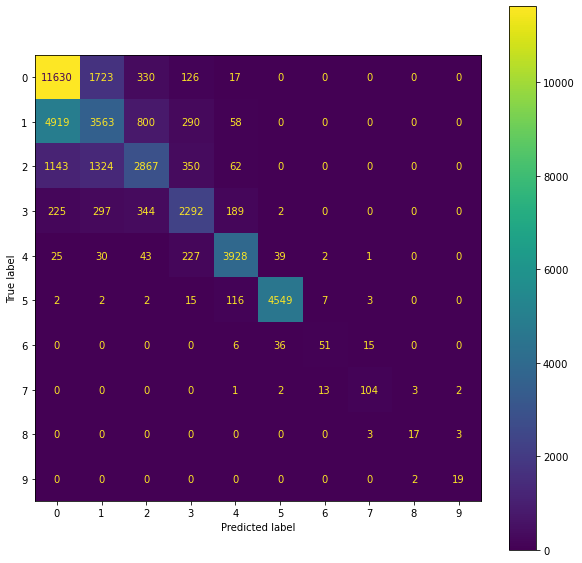

In [ ]:
rounded_preds4 = np.argmax(preds4, axis = -1)

y_test4 = np.argmax(y_test, axis = -1)

cm4 = confusion_matrix(y_test4, rounded_preds4)

disp4 = ConfusionMatrixDisplay(confusion_matrix = cm,)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);


In [ ]:
with open('./nnmodel.pkl', 'wb') as pickle_out:
    pickle_out = pickle.dump(model, pickle_out)

INFO:tensorflow:Assets written to: ram://ce581919-eedf-41c5-b959-3ddf93c501c9/assets
